<a href="https://colab.research.google.com/github/perezmonica/ProyectoGradoMAINN/blob/main/Proyecto_Analitica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar datos

In [1]:
import pandas as pd

# Leer los archivos GTFS
agency = pd.read_csv('/content/drive/MyDrive/Analitica/agency.txt')
calendar_dates = pd.read_csv('/content/drive/MyDrive/Analitica/calendar_dates.txt')
calendar = pd.read_csv('/content/drive/MyDrive/Analitica/calendar.txt')
fare_attributes = pd.read_csv('/content/drive/MyDrive/Analitica/fare_attributes.txt')
fare_rules = pd.read_csv('/content/drive/MyDrive/Analitica/fare_rules.txt')
frequencies = pd.read_csv('/content/drive/MyDrive/Analitica/frequencies.txt')
routes = pd.read_csv('/content/drive/MyDrive/Analitica/routes.txt')
shapes = pd.read_csv('/content/drive/MyDrive/Analitica/shapes.txt')
stop_times = pd.read_csv('/content/drive/MyDrive/Analitica/stop_times.txt')
stops = pd.read_csv('/content/drive/MyDrive/Analitica/stops.txt')
trips = pd.read_csv('/content/drive/MyDrive/Analitica/trips.txt')
entradas = pd.read_excel('/content/drive/MyDrive/Analitica/Entradas.xlsx')
salidas = pd.read_excel('/content/drive/MyDrive/Analitica/Salidas.xlsx')

In [ ]:
stop_names_list = [
    "Portal ElDorado", "Modelia", "Normandía", "Normandia", "AV. Rojas",
    "Avenida Rojas", "El Tiempo - Maloka", "Salitre - El Greco", "Salitre El Greco",
    "CAN", "Gobernación", "Quinta Paredes", "Recinto Ferial", "Ciudad Universitaria",
    "CAD", "Centro Memoria", "Universidades"
]

# Filtrar Dataframes
filtered_stops = stops[stops['stop_name'].isin(stop_names_list)]
filtered_stop_times = stop_times[stop_times['stop_id'].isin(filtered_stops['stop_id'])]
filtered_trips = trips[trips['trip_id'].isin(filtered_stop_times['trip_id'])]
filtered_routes = routes[routes['route_id'].isin(filtered_trips['route_id'])]
filtered_stop_times['stop_id'] = filtered_stop_times['stop_id'].astype(str)
stops['stop_id'] = stops['stop_id'].astype(str)
filtered_stop_times_with_codes = pd.merge(filtered_stop_times, stops[['stop_id', 'stop_code']], on='stop_id', how='left')
stop_codes_grouped = filtered_stop_times_with_codes.groupby('trip_id')['stop_code'].apply(list).reset_index(name='stops_array')
#stop_codes_grouped['stops_array'] = stop_codes_grouped['stops_array'].apply(lambda lst: ' '.join((lst)))

#Merge Dataframes
routes['route_id'] = routes['route_id'].astype(str)
filtered_trips['route_id'] = filtered_trips['route_id'].astype(str)
trips_with_route_names = pd.merge(filtered_trips, routes[['route_id', 'route_short_name', 'route_long_name']], on='route_id', how='left')

trips_with_route_names['trip_id'] = trips_with_route_names['trip_id'].astype(str)
stop_codes_grouped['trip_id'] = stop_codes_grouped['trip_id'].astype(str)

final_trips_df = pd.merge(trips_with_route_names, stop_codes_grouped, on='trip_id', how='left')
final_trips_df = final_trips_df[final_trips_df['stops_array'].apply(len) > 2]
final_trips_df['stops_array'] = final_trips_df['stops_array'].apply(lambda lst: ' '.join(lst))


<ipython-input-3-726c8c3b0988>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stop_times['stop_id'] = filtered_stop_times['stop_id'].astype(str)
<ipython-input-3-726c8c3b0988>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_trips['route_id'] = filtered_trips['route_id'].astype(str)


## Relacionar Rutas con Paradas

In [ ]:
# Trips con routes para saber qué viajes corresponden a qué ruta
trips_with_routes = pd.merge(trips, routes, on='route_id')

# Stop_times con trips_with_routes para relacionar tiempos de parada con rutas
stops_with_routes = pd.merge(stop_times, trips_with_routes, on='trip_id')

# Stops_with_routes con stops para obtener detalles completos de las paradas en cada ruta
full_stop_details = pd.merge(stops_with_routes, stops, on='stop_id')

## Analizar Frecuencias de Rutas

In [ ]:
# frequencies con trips para ver las frecuencias de cada viaje
trip_frequencies = pd.merge(frequencies, trips, on='trip_id')

# routes si necesitas información de ruta
route_frequencies = pd.merge(trip_frequencies, routes, on='route_id')

# Explorar trip_frequencies
print("Exploración de trip_frequencies:")
print("Primeras filas:")
print(trip_frequencies.head(), "\n")  # Primeras filas
print("Información del DataFrame:")
print(trip_frequencies.info(), "\n")  # Información sobre el DataFrame
print("Descripción estadística:")
print(trip_frequencies.describe(), "\n\n")  # Descripción estadística

# Explorar route_frequencies
print("Exploración de route_frequencies:")
print("Primeras filas:")
print(route_frequencies.head(), "\n")  # Primeras filas
print("Información del DataFrame:")
print(route_frequencies.info(), "\n")  # Información sobre el DataFrame
print("Descripción estadística:")
print(route_frequencies.describe(), "\n")

Exploración de trip_frequencies:
Primeras filas:
   trip_id start_time  end_time  headway_secs route_id  service_id shape_id
0  cable_1   04:30:00  22:00:00            60      C_1           7      C_1
1  cable_2   05:30:00  21:00:00            60      C_1           1      C_1 

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   trip_id       2 non-null      object
 1   start_time    2 non-null      object
 2   end_time      2 non-null      object
 3   headway_secs  2 non-null      int64 
 4   route_id      2 non-null      object
 5   service_id    2 non-null      int64 
 6   shape_id      2 non-null      object
dtypes: int64(2), object(5)
memory usage: 128.0+ bytes
None 

Descripción estadística:
       headway_secs  service_id
count           2.0    2.000000
mean           60.0    4.000000
std             0.0    4.242641
m

# Visualizar datos geograficamente

In [ ]:
!pip install geopandas


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
shapes = pd.read_csv('/content/drive/MyDrive/Analitica/shapes.txt')

# Convertir a un GeoDataFrame
gdf_shapes = gpd.GeoDataFrame(shapes, geometry=gpd.points_from_xy(shapes.shape_pt_lon, shapes.shape_pt_lat))


In [ ]:
# Lista de DataFrames
dataframes = {
    'Agency': agency,
    'Calendar Dates': calendar_dates,
    'Calendar': calendar,
    'Fare Attributes': fare_attributes,
    'Fare Rules': fare_rules,
    'Frequencies': frequencies,
    'Routes': routes,
    'Shapes': shapes,
    'Stop Times': stop_times,
    'Stops': stops,
    'Trips': trips
}

for name, df in dataframes.items():
    print(f"--- {name} ---")

    # Estadísticas descriptivas
    print("Estadísticas Descriptivas:")
    print(df.describe(include='all'))

    # Conteo de valores únicos
    print("\nValores Únicos:")
    for column in df.columns:
        print(f"{column}: {df[column].nunique()} valores únicos")

    # Identificar valores atípicos
    print("\nValores Atípicos (ejemplo para columnas numéricas):")
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        atipicos = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))).sum()
        print(f"{column}: {atipicos} valores atípicos")

    print("\n")

--- Agency ---
Estadísticas Descriptivas:
        agency_id           agency_name                        agency_url  \
count    7.000000                     7                                 7   
unique        NaN                     7                                 1   
top           NaN  Transmilenio-Troncal  https://www.transmilenio.gov.co/   
freq          NaN                     1                                 7   
mean     4.000000                   NaN                               NaN   
std      2.160247                   NaN                               NaN   
min      1.000000                   NaN                               NaN   
25%      2.500000                   NaN                               NaN   
50%      4.000000                   NaN                               NaN   
75%      5.500000                   NaN                               NaN   
max      7.000000                   NaN                               NaN   

       agency_timezone agency_lan

# Escalar datos para Netlogo

In [ ]:
!pip install geopandas pyproj pandas


In [ ]:
import geopandas as gpd
from pyproj import Proj, transform

# Crear un GeoDataFrame con las paradas de la agencia '1'
gdf = gpd.GeoDataFrame(filtered_stops, geometry=gpd.points_from_xy(filtered_stops.stop_lon, filtered_stops.stop_lat))

# Transformar coordenadas (ajusta el sistema de coordenadas según tu necesidad)
in_proj = Proj('epsg:4326')  # Sistema de coordenadas geográficas (WGS84)
out_proj = Proj('epsg:32618')  # Sistema de coordenadas proyectadas (UTM), ajusta según tu ubicación geográfica

# Transformar coordenadas
gdf['x'], gdf['y'] = transform(in_proj, out_proj, gdf['geometry'].x, gdf['geometry'].y)

# Escalar coordenadas a los límites especificados
x_min, y_min = gdf['x'].min(), gdf['y'].min()
x_max, y_max = gdf['x'].max(), gdf['y'].max()

gdf['x_scaled'] = ((gdf['x'] - x_min) / (x_max - x_min)) * 600
gdf['y_scaled'] = ((gdf['y'] - y_min) / (y_max - y_min)) * 250




<ipython-input-12-0c37107fa898>:12: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  gdf['x'], gdf['y'] = transform(in_proj, out_proj, gdf['geometry'].x, gdf['geometry'].y)


In [ ]:

gdf.to_excel('estaciones1.xlsx', index=False)


In [ ]:
final_trips_df.to_excel('trips_numerico.xlsx', index=False)
filtered_stop_times.to_excel('filtered_stop_times.xlsx', index=False)
filtered_routes.to_excel('filtered_routes.xlsx', index=False)

In [ ]:

filtered_shapes = shapes[shapes['shape_id'].isin(filtered_trips['shape_id'])]
gdf_shapes = gpd.GeoDataFrame(filtered_shapes, geometry=gpd.points_from_xy(filtered_shapes.shape_pt_lon, filtered_shapes.shape_pt_lat))

# Definir el sistema de coordenadas original (WGS84) y el objetivo (UTM o lo que sea adecuado para tu región)
in_proj = Proj('epsg:4326')
out_proj = Proj('epsg:32618')

# Transformar coordenadas
gdf_shapes['x'], gdf_shapes['y'] = transform(in_proj, out_proj, gdf_shapes['geometry'].x, gdf_shapes['geometry'].y)

<ipython-input-15-9412177ec130>:9: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  gdf_shapes['x'], gdf_shapes['y'] = transform(in_proj, out_proj, gdf_shapes['geometry'].x, gdf_shapes['geometry'].y)


In [ ]:
# Escalar coordenadas
x_min, y_min = gdf_shapes['x'].min(), gdf_shapes['y'].min()
x_max, y_max = gdf_shapes['x'].max(), gdf_shapes['y'].max()

gdf_shapes['x_scaled'] = ((gdf_shapes['x'] - x_min) / (x_max - x_min)) * 650   # Ejemplo de escala para X
gdf_shapes['y_scaled'] = ((gdf_shapes['y'] - y_min) / (y_max - y_min)) * 200   # Ejemplo de escala para Y


In [ ]:
# Exportar a Excel
gdf_shapes[['shape_id', 'shape_pt_sequence', 'x_scaled', 'y_scaled']].to_excel('scaled_shapes_for_netlogo.xlsx', index=False)


# Modelo de pasajeros

In [2]:
salidas.rename(columns={'INTERVALO': 'Intervalo'}, inplace=True)

# Corregir el FutureWarning especificando numeric_only=True
df_entrada = entradas.drop ('Total general', axis = 1)
df_entrada = df_entrada.groupby(['stop_id', 'Intervalo'], as_index=False).sum(numeric_only=True)

# Derretir el DataFrame para que las columnas de fecha se conviertan en una sola columna
df_melted_entradas = df_entrada.melt(id_vars=['stop_id', 'Intervalo'],
                            var_name='Fecha_str',
                            value_name='Entradas')

# Convertir 'Intervalo' a datetime, ya que parece estar en formato de 24 horas sin AM/PM
df_melted_entradas['Intervalo'] = pd.to_datetime(df_melted_entradas['Intervalo'], format='%H:%M:%S').dt.time

# Corregir el FutureWarning especificando numeric_only=True
df_salida = salidas.drop ('Total general', axis = 1)
df_salida = df_salida.groupby(['stop_id', 'Intervalo'], as_index=False).sum(numeric_only=True)

# Derretir el DataFrame para que las columnas de fecha se conviertan en una sola columna
df_melted_salidas = df_salida.melt(id_vars=['stop_id', 'Intervalo'],
                            var_name='Fecha_str',
                            value_name='Entradas')

# Convertir 'Intervalo' a datetime, ya que parece estar en formato de 24 horas sin AM/PM
df_melted_salidas['Intervalo'] = pd.to_datetime(df_melted_entradas['Intervalo'], format='%H:%M:%S').dt.time

entradas_salidas_combinadas = pd.merge(df_melted_entradas, df_melted_salidas, on=['stop_id', 'Intervalo', 'Fecha_str'], suffixes=('df_melted_entradas', 'df_melted_salidas'))

# 2. Unir con Datos de Paradas GTFS
datos_combinados = entradas_salidas_combinadas

# Conversión de 'Intervalo' a hora del día (simplificado)
datos_combinados['Intervalo'] = pd.to_datetime(datos_combinados['Intervalo'], format='%H:%M:%S')
datos_combinados['Hora'] = datos_combinados['Intervalo'].dt.hour
datos_combinados['Dia_semana'] = datos_combinados['Fecha_str'].dt.dayofweek
dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
datos_combinados['Nombre_dia'] = datos_combinados['Fecha_str'].dt.dayofweek.apply(lambda x: dias[x])

print(datos_combinados.head(), "\n")
print(datos_combinados.info(), "\n")


         stop_id           Intervalo  Fecha_str  Entradasdf_melted_entradas  \
0  ESTACION_6000 1900-01-01 03:45:00 2023-08-01                           0   
1  ESTACION_6000 1900-01-01 04:00:00 2023-08-01                           1   
2  ESTACION_6000 1900-01-01 04:15:00 2023-08-01                          74   
3  ESTACION_6000 1900-01-01 04:15:00 2023-08-01                          74   
4  ESTACION_6000 1900-01-01 04:30:00 2023-08-01                         313   

   Entradasdf_melted_salidas  Hora  Dia_semana Nombre_dia  
0                         28     3           1     Martes  
1                          6     4           1     Martes  
2                         16     4           1     Martes  
3                        451     4           1     Martes  
4                          5     4           1     Martes   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33291 entries, 0 to 33290
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 

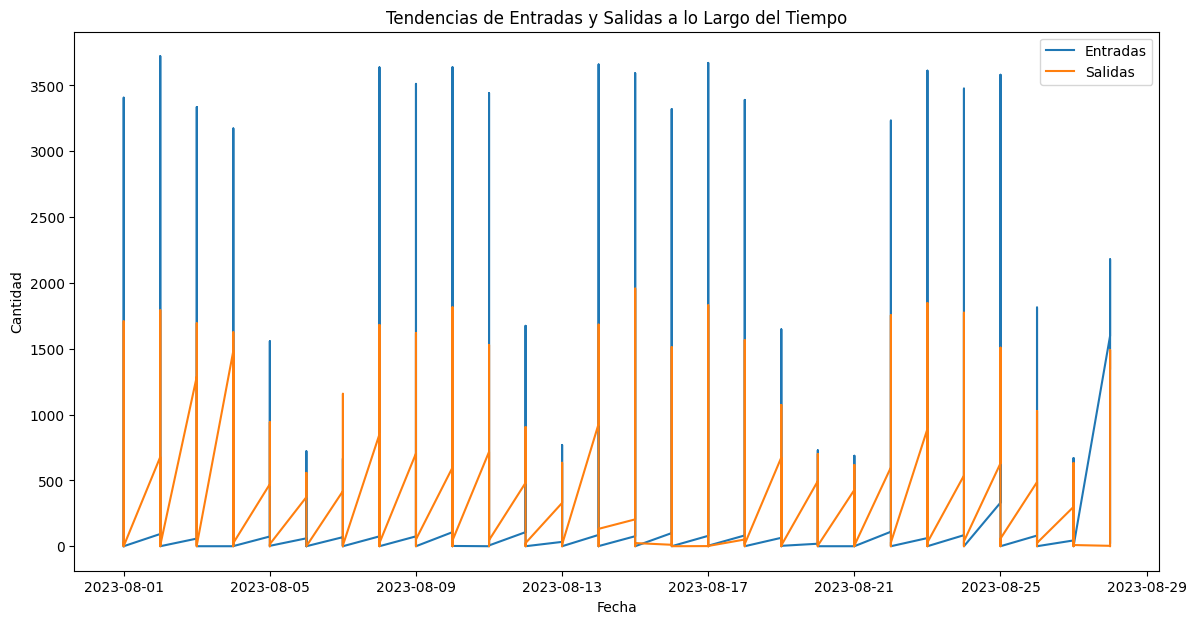

<ipython-input-5-9d574fb7b870>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Nombre_dia').sum()[['Entradasdf_melted_entradas', 'Entradasdf_melted_salidas']].plot(kind='bar')


<Figure size 1000x500 with 0 Axes>

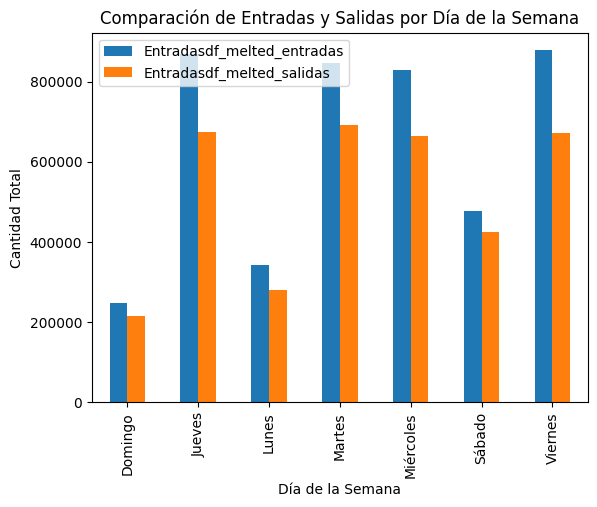

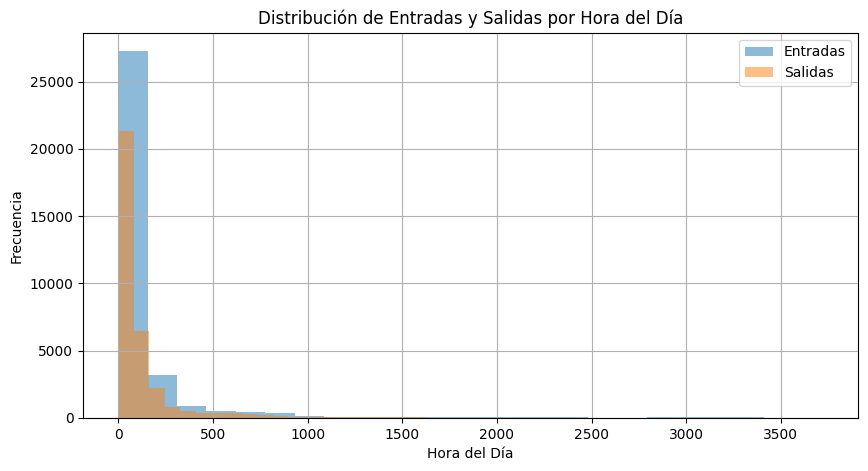

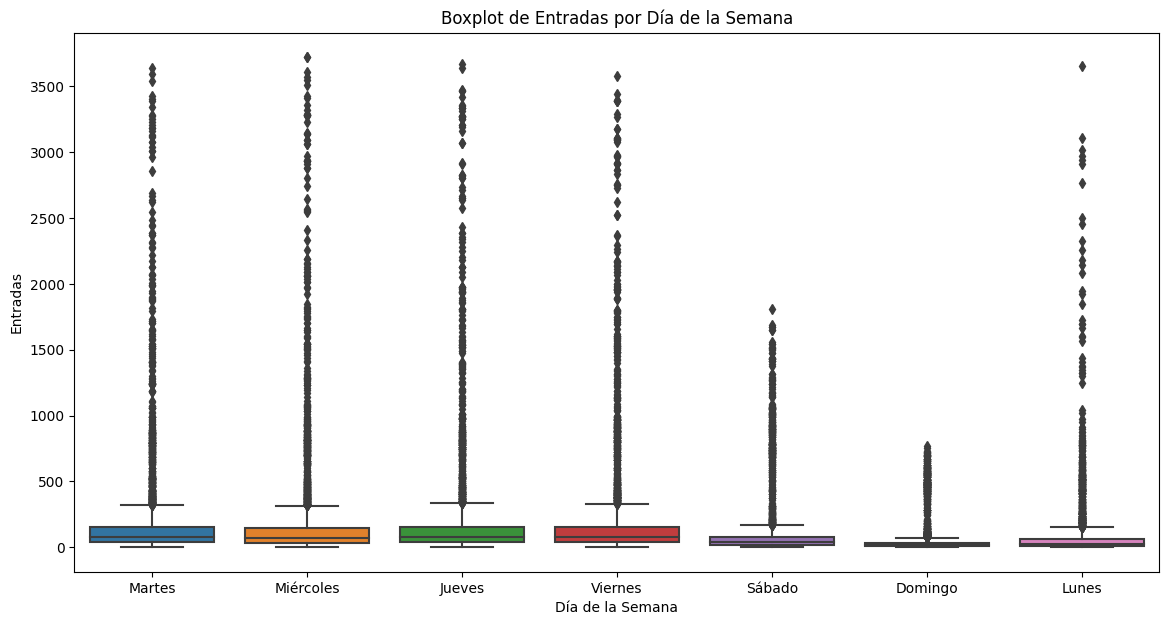

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'df' es tu DataFrame con los datos cargados.
df=datos_combinados
# Gráfico de Series Temporales
plt.figure(figsize=(14, 7))
plt.plot(df['Fecha_str'], df['Entradasdf_melted_entradas'], label='Entradas')
plt.plot(df['Fecha_str'], df['Entradasdf_melted_salidas'], label='Salidas')
plt.title('Tendencias de Entradas y Salidas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.show()

# Gráfico de Barras
plt.figure(figsize=(10, 5))
df.groupby('Nombre_dia').sum()[['Entradasdf_melted_entradas', 'Entradasdf_melted_salidas']].plot(kind='bar')
plt.title('Comparación de Entradas y Salidas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad Total')
plt.show()

# Histogramas
plt.figure(figsize=(10, 5))
df['Entradasdf_melted_entradas'].hist(bins=24, alpha=0.5, label='Entradas')
df['Entradasdf_melted_salidas'].hist(bins=24, alpha=0.5, label='Salidas')
plt.title('Distribución de Entradas y Salidas por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Boxplots
plt.figure(figsize=(14, 7))
sns.boxplot(x='Nombre_dia', y='Entradasdf_melted_entradas', data=df)
plt.title('Boxplot de Entradas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Entradas')
plt.show()

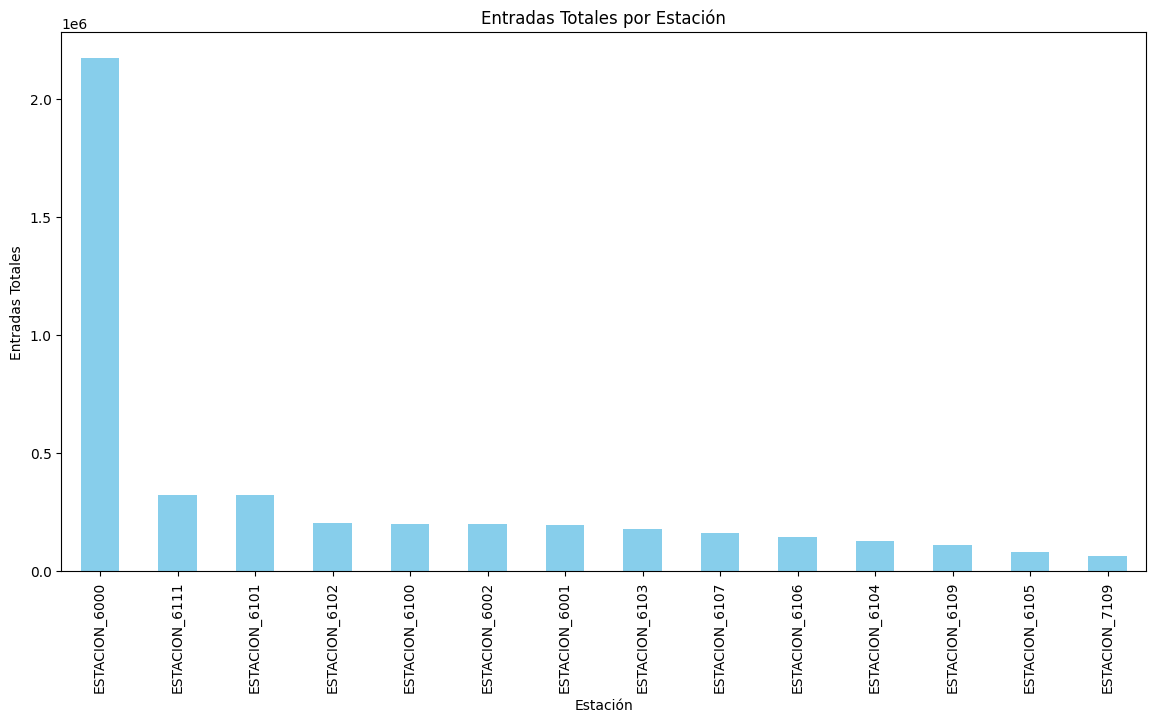

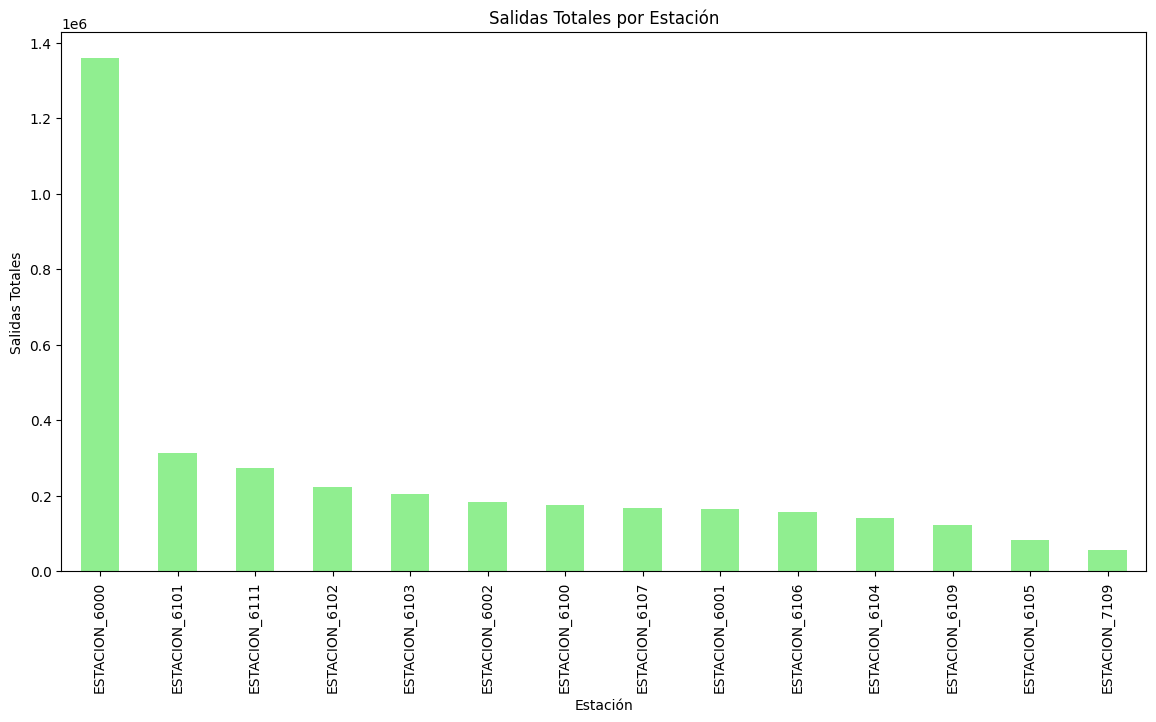

In [ ]:
# Suma de entradas y salidas por estación
entradas_por_estacion = df.groupby('stop_id')['Entradasdf_melted_entradas'].sum().sort_values(ascending=False)
salidas_por_estacion = df.groupby('stop_id')['Entradasdf_melted_salidas'].sum().sort_values(ascending=False)

# Gráfico de barras para entradas
plt.figure(figsize=(14, 7))
entradas_por_estacion.plot(kind='bar', color='skyblue')
plt.title('Entradas Totales por Estación')
plt.xlabel('Estación')
plt.ylabel('Entradas Totales')
plt.xticks(rotation=90)  # Rota las etiquetas si hay muchas estaciones
plt.show()

# Gráfico de barras para salidas
plt.figure(figsize=(14, 7))
salidas_por_estacion.plot(kind='bar', color='lightgreen')
plt.title('Salidas Totales por Estación')
plt.xlabel('Estación')
plt.ylabel('Salidas Totales')
plt.xticks(rotation=90)  # Rota las etiquetas si hay muchas estaciones
plt.show()

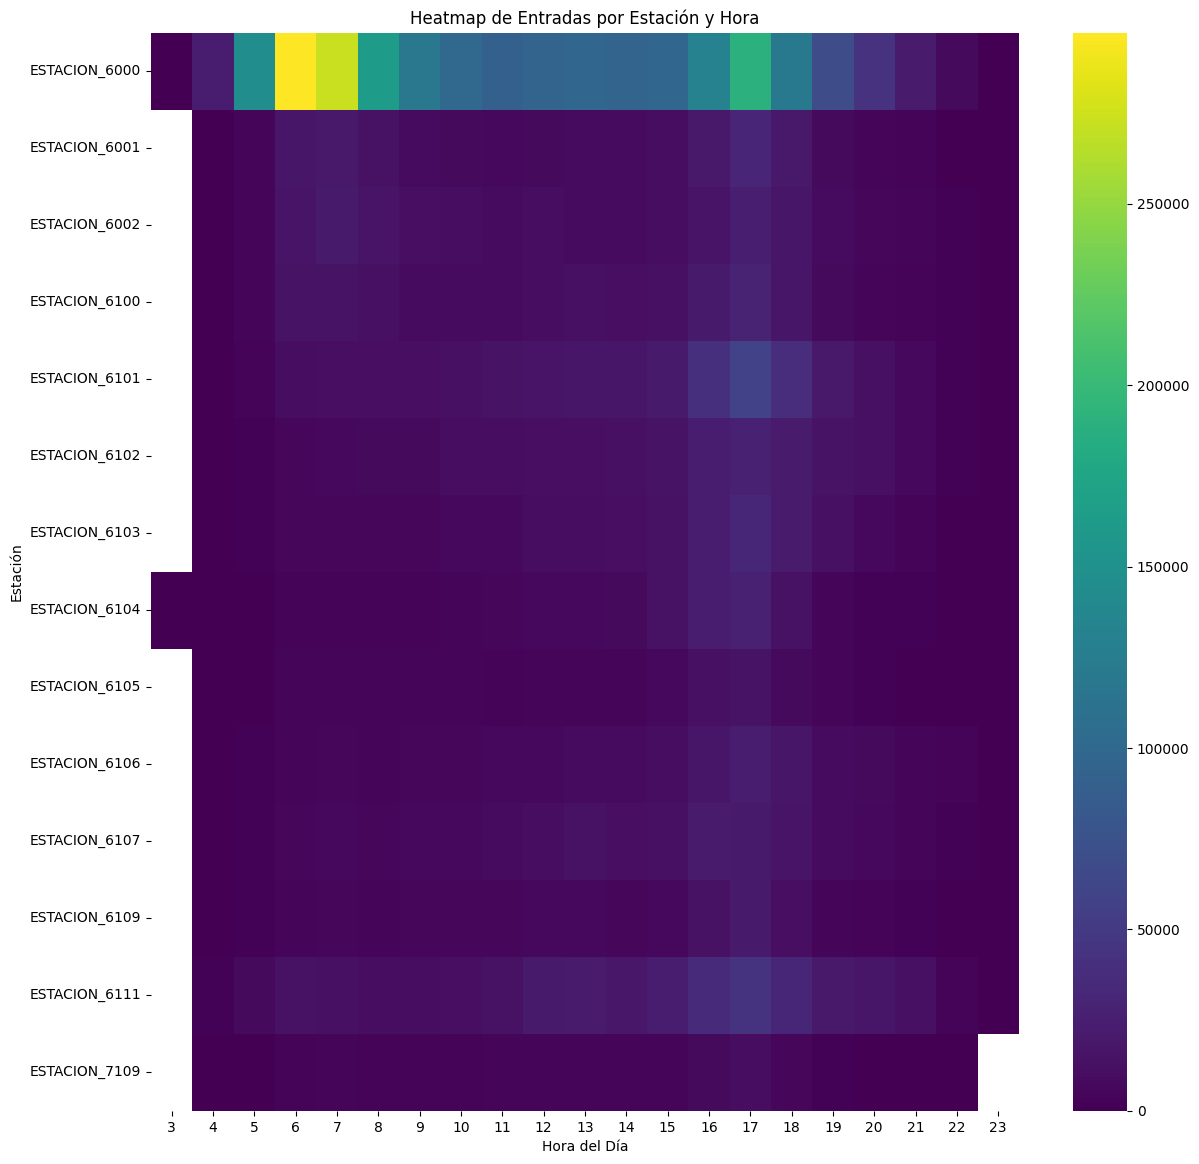

In [ ]:
# Prepara los datos para el heatmap
heatmap_data = df.pivot_table(values='Entradasdf_melted_entradas', index='stop_id', columns='Hora', aggfunc='sum')

# Gráfico de heatmap para entradas
plt.figure(figsize=(14, 14))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap de Entradas por Estación y Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Estación')
plt.show()

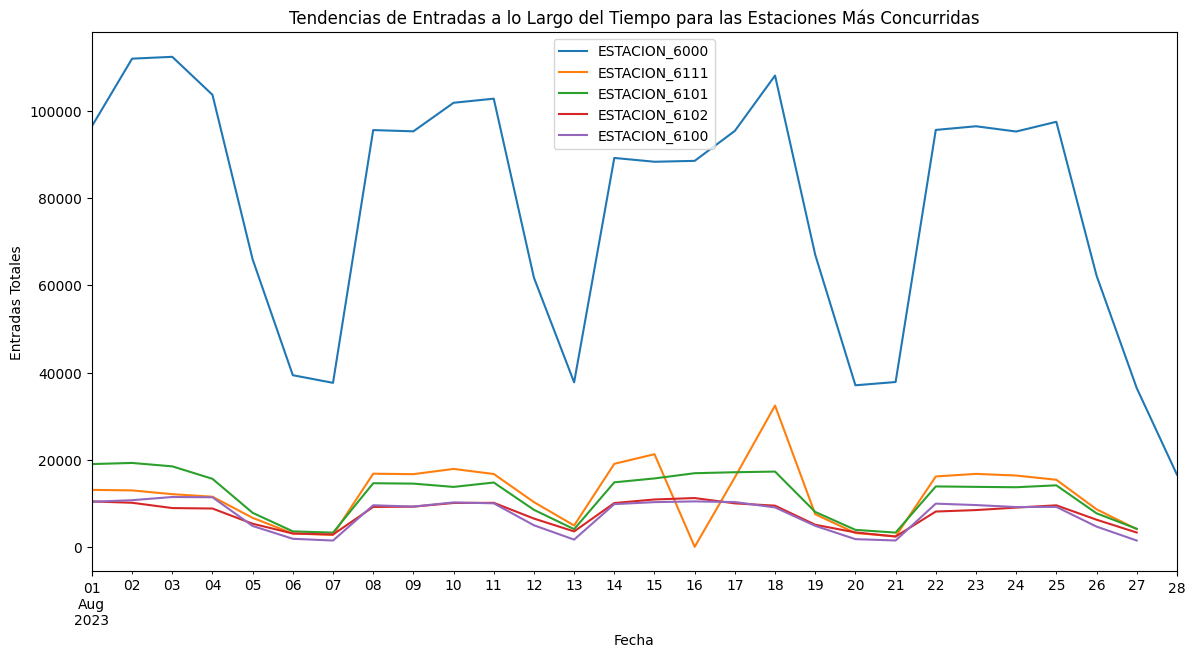

In [ ]:
# Seleccionar las estaciones más concurridas
top_estaciones = entradas_por_estacion.head(5).index.tolist()

# Filtrar los datos para solo incluir las estaciones más concurridas
df_top_estaciones = df[df['stop_id'].isin(top_estaciones)]

# Gráfico de líneas para las estaciones más concurridas
plt.figure(figsize=(14, 7))
for estacion in top_estaciones:
    df_estacion = df_top_estaciones[df_top_estaciones['stop_id'] == estacion]
    df_estacion.resample('D', on='Fecha_str')['Entradasdf_melted_entradas'].sum().plot(label=estacion)

plt.title('Tendencias de Entradas a lo Largo del Tiempo para las Estaciones Más Concurridas')
plt.xlabel('Fecha')
plt.ylabel('Entradas Totales')
plt.legend()
plt.show()

In [3]:
datos_combinados.to_excel('datos_combinadosentradassalidas.xlsx', index=False)

## Analisis de la serie de tiempo

In [4]:
df=datos_combinados
# Extraer la hora del 'Intervalo' y combinarla con 'Fecha_str' para obtener la 'Fecha_Hora' completa
df['Hora'] = df['Intervalo'].dt.time
df['Fecha_Hora'] = pd.to_datetime(df['Fecha_str'].apply(lambda x: x.strftime('%Y-%m-%d')) + ' ' + df['Hora'].astype(str))

df.to_excel('df1.xlsx', index=False)

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Asegúrate de que la columna de tiempo es el índice del DataFrame
df['Fecha_str'] = pd.to_datetime(df['Fecha_str'])
df.set_index('Fecha_str', inplace=True)
print(df.head())
# Selecciona la columna que contiene los valores de la serie temporal
ts = df['Entradasdf_melted_entradas']

# Realiza la prueba de Dickey-Fuller aumentada
result = adfuller(ts.dropna(), autolag='AIC')  # Asegúrate de eliminar valores NaN con .dropna()

print(f'Test Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# Si el p-value es menor que 0.05, la serie temporal es estacionaria.
# De lo contrario, se necesitan pasos adicionales para hacer la serie estacionaria, como la diferenciación.

                  stop_id           Intervalo  Entradasdf_melted_entradas  \
Fecha_str                                                                   
2023-08-01  ESTACION_6000 1900-01-01 03:45:00                           0   
2023-08-01  ESTACION_6000 1900-01-01 04:00:00                           1   
2023-08-01  ESTACION_6000 1900-01-01 04:15:00                          74   
2023-08-01  ESTACION_6000 1900-01-01 04:15:00                          74   
2023-08-01  ESTACION_6000 1900-01-01 04:30:00                         313   

            Entradasdf_melted_salidas      Hora  Dia_semana Nombre_dia  \
Fecha_str                                                                
2023-08-01                         28  03:45:00           1     Martes   
2023-08-01                          6  04:00:00           1     Martes   
2023-08-01                         16  04:15:00           1     Martes   
2023-08-01                        451  04:15:00           1     Martes   
2023-08-01      

<Figure size 640x480 with 0 Axes>

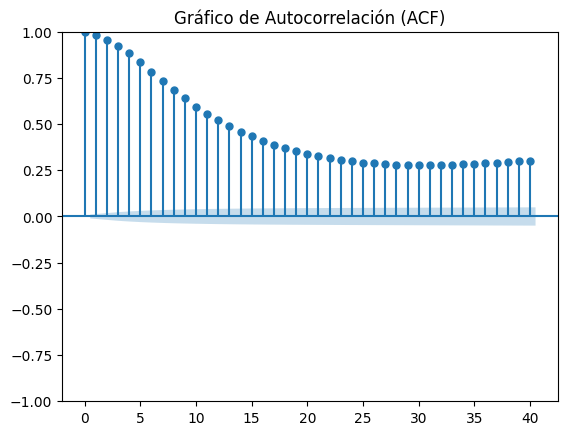

<Figure size 640x480 with 0 Axes>

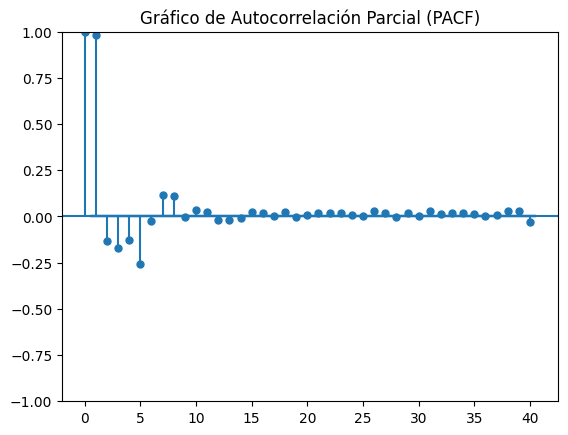

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Selecciona la serie temporal
ts = df['Entradasdf_melted_entradas']

# Gráfico de Autocorrelación (ACF)
plt.figure()
plot_acf(ts.dropna(), lags=40)  # Puedes ajustar el número de lags según sea necesario
plt.title('Gráfico de Autocorrelación (ACF)')
plt.show()

# Gráfico de Autocorrelación Parcial (PACF)
plt.figure()
plot_pacf(ts.dropna(), lags=40)  # Puedes ajustar el número de lags según sea necesario
plt.title('Gráfico de Autocorrelación Parcial (PACF)')
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Suponiendo que 'Fecha_str' es tu índice de fecha y que los datos son horarios.
df.index = pd.date_range(start=df.index[0], periods=len(df), freq='H')
df = df.asfreq('H')

# Configura y entrena el modelo ARIMA

model = ARIMA(ts, order=(1, 0, 1))
model_fit = model.fit()

# Resumen del modelo ajustado
print(model_fit.summary())

# Realiza predicciones
predicciones = model_fit.forecast(steps=5)  # Reemplaza 5 con el número de pasos de tiempo que quieras predecir
print(predicciones)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                   SARIMAX Results                                    
Dep. Variable:     Entradasdf_melted_entradas   No. Observations:                33291
Model:                         ARIMA(1, 0, 1)   Log Likelihood             -184664.425
Date:                        Fri, 17 Nov 2023   AIC                         369336.850
Time:                                09:30:25   BIC                         369370.502
Sample:                                     0   HQIC                        369347.594
                                      - 33291                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        134.8588     27.223      4.954      0.000      81.503     188.215
ar.L1          0.9754      0.000   2500.824      0.000       0.975 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Suponiendo que 'Fecha_str' es tu índice de fecha y que los datos son horarios.
df.index = pd.date_range(start=df.index[0], periods=len(df), freq='H')
df = df.asfreq('H')

# Configura y entrena el modelo ARIMA

model = ARIMA(ts, order=(1, 0, 0))
model_fit = model.fit()

# Resumen del modelo ajustado
print(model_fit.summary())

# Realiza predicciones
predicciones = model_fit.forecast(steps=5)  # Reemplaza 5 con el número de pasos de tiempo que quieras predecir
print(predicciones)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                   SARIMAX Results                                    
Dep. Variable:     Entradasdf_melted_entradas   No. Observations:                33291
Model:                         ARIMA(1, 0, 0)   Log Likelihood             -184891.473
Date:                        Fri, 17 Nov 2023   AIC                         369788.947
Time:                                14:28:34   BIC                         369814.186
Sample:                                     0   HQIC                        369797.005
                                      - 33291                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        134.8589     30.024      4.492      0.000      76.012     193.706
ar.L1          0.9795      0.000   2792.660      0.000       0.979 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


### Para días en fin de semana

In [ ]:
# Dividir el DataFrame en días de semana y fin de semana usando la columna 'Dia_semana'
# Días de semana (Lunes=0, Martes=1, ..., Viernes=4)
df_dias_entre_semana = df[df['Dia_semana'] <= 4]

# Fin de semana (Sábado=5, Domingo=6)
df_fines_de_semana = df[df['Dia_semana'] >= 5]


In [ ]:
from statsmodels.tsa.stattools import adfuller
df = df_fines_de_semana

# Selecciona la columna que contiene los valores de la serie temporal
ts = df['Entradasdf_melted_entradas']

# Realiza la prueba de Dickey-Fuller aumentada
result = adfuller(ts.dropna(), autolag='AIC')  # Asegúrate de eliminar valores NaN con .dropna()

print(f'Test Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# Si el p-value es menor que 0.05, la serie temporal es estacionaria.
# De lo contrario, se necesitan pasos adicionales para hacer la serie estacionaria, como la diferenciación.

Test Statistic: -11.532310429306433
p-value: 3.805707311772138e-21
Critial Values:
   1%, -3.431016362152566
Critial Values:
   5%, -2.8618344918247907
Critial Values:
   10%, -2.5669267528693402


<Figure size 640x480 with 0 Axes>

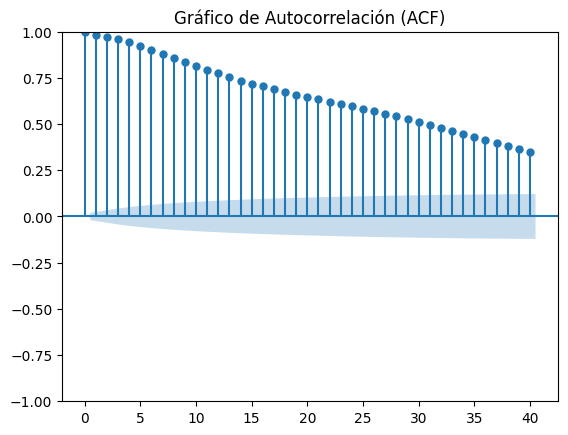

<Figure size 640x480 with 0 Axes>

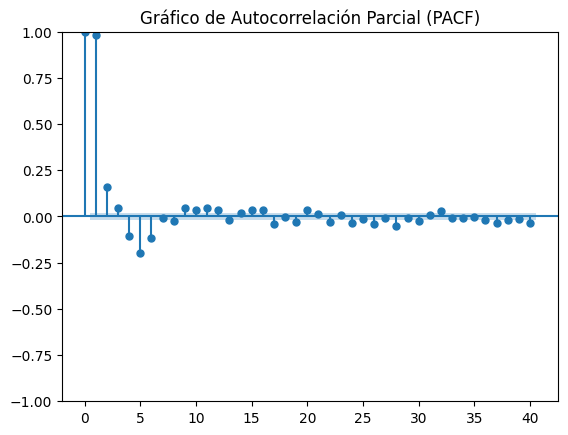

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Selecciona la serie temporal
ts = df['Entradasdf_melted_entradas']

# Gráfico de Autocorrelación (ACF)
plt.figure()
plot_acf(ts.dropna(), lags=40)  # Puedes ajustar el número de lags según sea necesario
plt.title('Gráfico de Autocorrelación (ACF)')
plt.show()

# Gráfico de Autocorrelación Parcial (PACF)
plt.figure()
plot_pacf(ts.dropna(), lags=40)  # Puedes ajustar el número de lags según sea necesario
plt.title('Gráfico de Autocorrelación Parcial (PACF)')
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Suponiendo que 'Fecha_str' es tu índice de fecha y que los datos son horarios.
df.index = pd.date_range(start=df.index[0], periods=len(df), freq='H')
df = df.asfreq('H')

# Configura y entrena el modelo ARIMA

model = ARIMA(ts, order=(1, 0, 1))
model_fit = model.fit()

# Resumen del modelo ajustado
print(model_fit.summary())

# Realiza predicciones
predicciones = model_fit.forecast(steps=96)  # Reemplaza 5 con el número de pasos de tiempo que quieras predecir
print(predicciones)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                   SARIMAX Results                                    
Dep. Variable:     Entradasdf_melted_entradas   No. Observations:                 9854
Model:                         ARIMA(1, 0, 1)   Log Likelihood              -48111.130
Date:                        Fri, 17 Nov 2023   AIC                          96230.261
Time:                                10:09:19   BIC                          96259.043
Sample:                                     0   HQIC                         96240.011
                                       - 9854                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.4706     40.649      1.807      0.071      -6.200     153.141
ar.L1          0.9878      0.001   1643.570      0.000       0.987 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Ajusta el modelo ARIMA a tus datos de serie temporal
modelo_arima = ARIMA(ts, order=(1, 0, 1))
resultado_arima = modelo_arima.fit()

# Encuentra el próximo día entre semana y fin de semana en tus datos
# Puedes hacer esto programáticamente o simplemente seleccionar una fecha basada en tu conocimiento del dataset
fecha_dia_entre_semana = '2023-09-04'  # Reemplaza con la fecha que quieras pronosticar
fecha_dia_fin_semana = '2023-09-03'  # Reemplaza con la fecha que quieras pronosticar

# Pronostica el día completo entre semana (asumiendo datos cada 15 minutos, hay 96 intervalos en un día)
pronostico_dia_entre_semana = resultado_arima.get_forecast(steps=96, start=pd.to_datetime(fecha_dia_entre_semana))

# Pronostica el día completo de fin de semana
pronostico_dia_fin_semana = resultado_arima.get_forecast(steps=96, start=pd.to_datetime(fecha_dia_fin_semana))

# Los resultados de las predicciones se pueden visualizar o analizar como sea necesario


# Analisis resultados de la simulación

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga los DataFrames
df_dia_entre_semana = pd.read_excel('/content/Dia entre semana.xlsx')
df_fin_de_semana = pd.read_excel('/content/Fin de semana.xlsx')
df_dia_entre_semana.head()



,stop_id,Fecha_str,Entradas_inical,Salidas_inical,Dia_semana,Nombre_dia,Fecha_Hora,ale,delta,Entradas,ale2,delta2,Salidas
0,ESTACION_6000,2023-08-15,76,204,1,Martes,2023-08-15 04:15:00,0.501147,0,76,0.079784,2,202
1,ESTACION_6000,2023-08-15,227,426,1,Martes,2023-08-15 04:30:00,0.080806,2,225,0.427611,4,422
2,ESTACION_6000,2023-08-15,525,764,1,Martes,2023-08-15 04:45:00,0.686312,5,530,0.085592,7,757
3,ESTACION_6000,2023-08-15,1017,837,1,Martes,2023-08-15 05:00:00,0.306799,10,1007,0.282715,8,829
4,ESTACION_6000,2023-08-15,1282,1017,1,Martes,2023-08-15 05:15:00,0.435987,12,1270,0.046348,10,1007


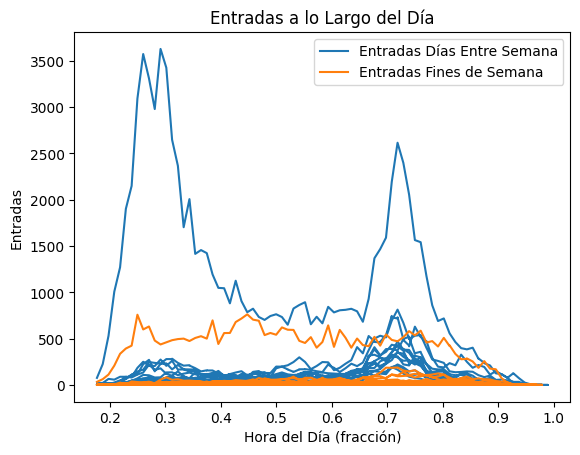

In [10]:

# Función para convertir la hora en una fracción del día
def hora_a_fraccion_del_dia(hora):
    return hora.hour / 24 + hora.minute / (24 * 60) + hora.second / (24 * 3600)

# Aplicar la función a las columnas de hora
df_dia_entre_semana['Hora_Fraccion'] = df_dia_entre_semana['Fecha_Hora'].apply(hora_a_fraccion_del_dia)
df_fin_de_semana['Hora_Fraccion'] = df_fin_de_semana['Fecha_Hora'].apply(hora_a_fraccion_del_dia)

# Graficar series temporales de entradas y salidas por hora
plt.plot(df_dia_entre_semana['Hora_Fraccion'], df_dia_entre_semana['Entradas'], label='Entradas Días Entre Semana')
plt.plot(df_fin_de_semana['Hora_Fraccion'], df_fin_de_semana['Entradas'], label='Entradas Fines de Semana')
plt.xlabel('Hora del Día (fracción)')
plt.ylabel('Entradas')
plt.title('Entradas a lo Largo del Día')
plt.legend()
plt.show()

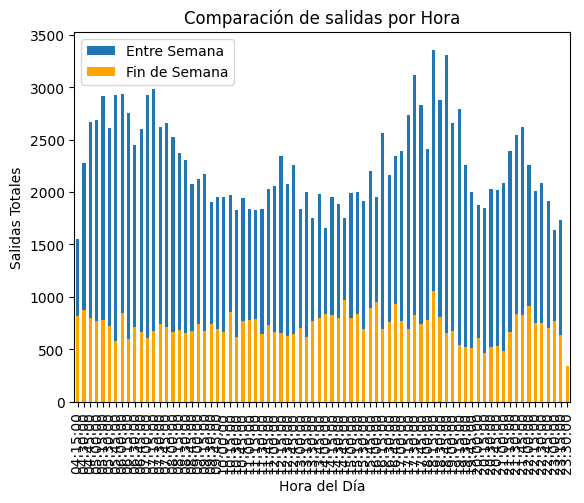

In [23]:
# Gráfico de barras para comparar las entradas en diferentes horas del día
#df_dia_entre_semana['Fecha_Hora'] = pd.to_datetime(df_dia_entre_semana['Fecha_Hora']).dt.time
#df_fin_de_semana['Fecha_Hora'] = pd.to_datetime(df_fin_de_semana['Fecha_Hora']).dt.time

df_dia_entre_semana.groupby('Fecha_Hora')['Salidas'].sum().plot(kind='bar', label='Entre Semana')
df_fin_de_semana.groupby('Fecha_Hora')['Salidas'].sum().plot(kind='bar', label='Fin de Semana', color='orange')
plt.xlabel('Hora del Día')
plt.ylabel('Salidas
Totales')
plt.title(f'Comparación de salidas por Hora')
plt.legend()
plt.show()


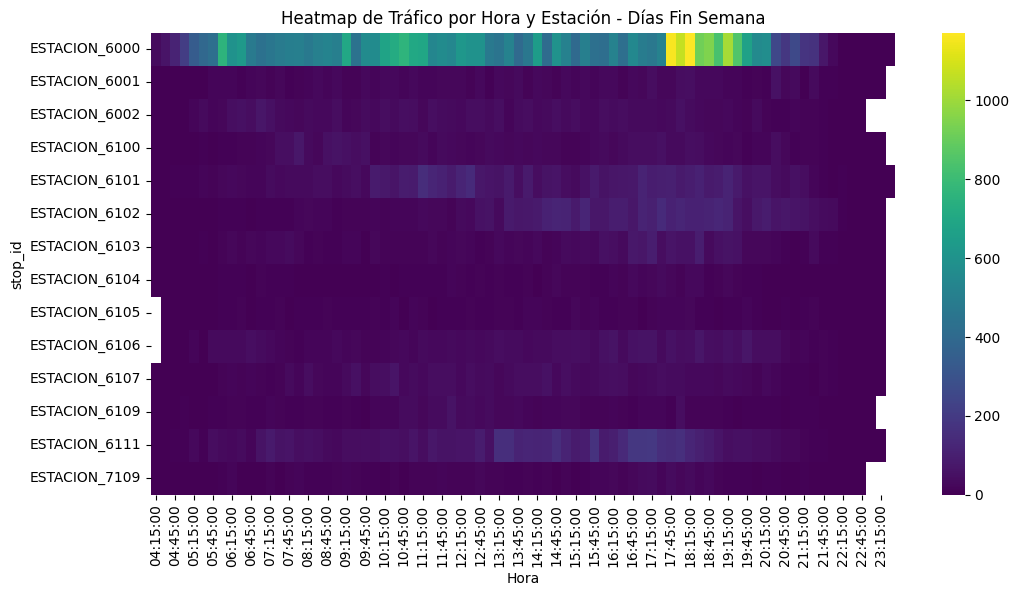

In [19]:
import seaborn as sns

# Crear un DataFrame para el heatmap
heatmap_data = df_fin_de_semana.pivot_table(index='stop_id', columns='Hora', values='Entradas', aggfunc='sum')

# Dibujar el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap de Tráfico por Hora y Estación - Días Fin Semana')
plt.show()


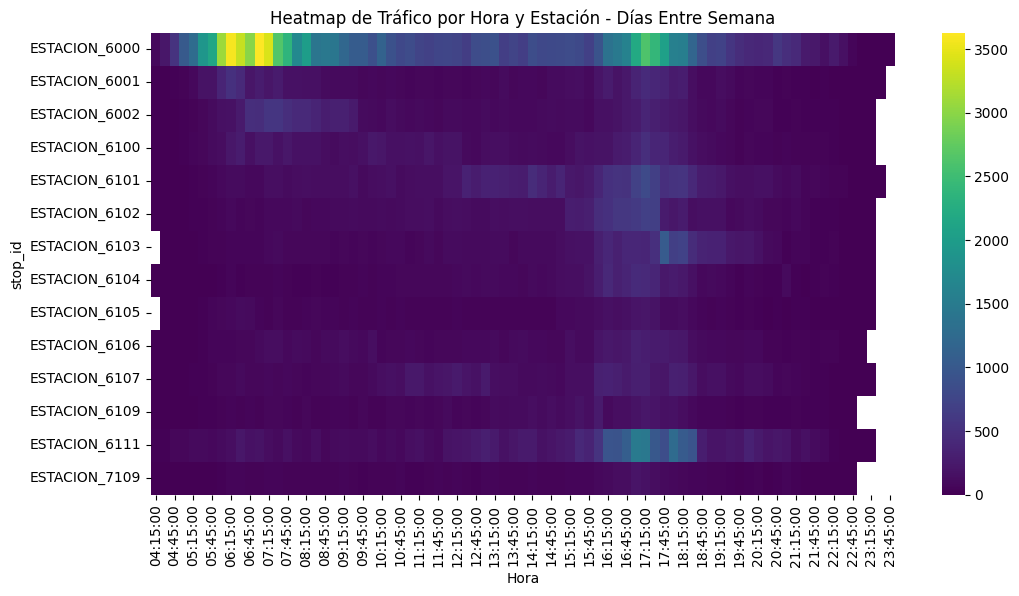

In [20]:
# Crear un DataFrame para el heatmap
heatmap_data = df_dia_entre_semana.pivot_table(index='stop_id', columns='Hora', values='Entradas', aggfunc='sum')

# Dibujar el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap de Tráfico por Hora y Estación - Días Entre Semana')
plt.show()